# Bad Bunny songs analyzed by popularity, release year, and musical genre (reggaeton or not)


In [76]:
!pip install spotipy

In [77]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [78]:
# Credenciales de la app de Spotify
CLIENT_ID = '04afb9a4dfc34a2ba6ab9fefc30358b5'
CLIENT_SECRET = '44ef46e579df499c8a155933264a04fb'

In [79]:
# Autenticación con Client Credentials Flow
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [80]:
# Buscar a Bad Bunny, imprimir si se encuentra
resultado = sp.search(q='Bad Bunny', type='artist', limit=1)
print(resultado['artists']['items'][0]['name'])

Bad Bunny


In [81]:
import pandas as pd
import numpy as np
from time import sleep

# Obtener el ID del artista
bad_bunny_id = resultado['artists']['items'][0]['id']

# Función para obtener todos los álbumes (de cualquier tipo)
def get_all_albums(artist_id, album_type='album'):
    albums = []
    results = sp.artist_albums(artist_id, album_type=album_type, limit=50)
    albums += results['items']
    while results['next']:
        results = sp.next(results)
        albums += results['items']
    return albums

# Obtener todos los álbumes y singles del artista
albums = get_all_albums(bad_bunny_id, album_type='album')
singles = get_all_albums(bad_bunny_id, album_type='single')
all_releases = albums + singles

# Crear sets de IDs para distinguir albums y singles
album_ids_set = {album['id'] for album in albums}
single_ids_set = {single['id'] for single in singles}

# Evitar duplicados
album_ids = list({album['id'] for album in all_releases})

# Extraer tracks de cada álbum/single
tracks_data = []

for album_id in album_ids:
    album = sp.album(album_id)
    release_date = album['release_date']
    album_name = album['name']

    # Detectar si es single
    if album_id in single_ids_set:
        album_name = 'Single'

    tracks = album['tracks']['items']
    
    for track in tracks:
        tracks_data.append({
            'track_name': track['name'],
            'track_id': track['id'],
            'album': album_name,
            'release_date': release_date,
            'duration_ms': track['duration_ms']
        })

# Convertimos a DataFrame
df_tracks = pd.DataFrame(tracks_data)

# Obtener popularidades en bloques de 50
popularities = []
track_ids = df_tracks['track_id'].tolist()

for i in range(0, len(track_ids), 50):
    batch = track_ids[i:i+50]
    try:
        track_infos = sp.tracks(batch)['tracks']
        popularities += [track['popularity'] for track in track_infos]
    except:
        popularities += [None] * len(batch)
        sleep(1)

# Añadir columnas al DataFrame
df_tracks['popularity'] = popularities
df_tracks['duration_min'] = df_tracks['duration_ms'] / 60000


df_tracks.head(50)


,track_name,track_id,album,release_date,duration_ms,popularity,duration_min
0,Solo de Mi,5YOkA7qd2983FtBQnP8sYx,Single,2018-12-14,197967,60,3.299450
1,EL MUNDO ES MÍO,36DHxTW2xdr9GG15T9oK9L,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,165199,63,2.753317
2,TE MUDASTE,5RubKOuDoPn5Kj5TLVxSxY,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,130013,74,2.166883
3,HOY COBRÉ,0tjZv2hChdHZCW1zFXpy1J,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,162151,67,2.702517
4,MALDITA POBREZA,0Lsis3LB0XAK6XlTHXaJk2,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,213609,63,3.560150
5,LA NOCHE DE ANOCHE,2XIc1pqjXV3Cr2BQUGNBck,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,203200,77,3.386667
6,TE DESEO LO MEJOR,23XjN1s3DZC8Q9ZwuorYY4,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,139576,70,2.326267
7,YO VISTO ASÍ,5fROvzNghPid8mbKNDYvpJ,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,191526,66,3.192100
8,HACIENDO QUE ME AMAS,26QApq0cuO9brJigr0C0W4,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,217768,76,3.629467
9,BOOKER T,26w9NTiE9NGjW1ZvIOd1So,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,156430,76,2.607167


In [82]:
len(df_tracks)

225

In [83]:
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'])
df_tracks['release_date']

0     2018-12-14
1     2020-11-27
2     2020-11-27
3     2020-11-27
4     2020-11-27
         ...    
220   2017-09-29
221   2017-12-01
222   2017-06-05
223   2017-05-26
224   2017-10-06
Name: release_date, Length: 225, dtype: datetime64[ns]

In [84]:
grouped_df = df_tracks.groupby('album').agg(avg_popularity=('popularity', np.mean))
grouped_df.head(100)

,avg_popularity
album,
DeBÍ TiRAR MáS FOToS,88.411765
EL ÚLTIMO TOUR DEL MUNDO,69.687500
LAS QUE NO IBAN A SALIR,63.200000
OASIS,70.875000
Single,61.329787
Un Verano Sin Ti,79.608696
X 100PRE,68.800000
YHLQMDLG,72.700000
nadie sabe lo que va a pasar mañana,69.590909


In [85]:
df_tracks[df_tracks['track_name'].str.contains('where she goes', case=False, na=False)]

,track_name,track_id,album,release_date,duration_ms,popularity,duration_min
40,WHERE SHE GOES,7ro0hRteUMfnOioTFI5TG1,Single,2023-05-18,231704,78,3.861733
170,WHERE SHE GOES,2sTDlCxmuZCTDKKk9f1qus,nadie sabe lo que va a pasar mañana,2023-10-13,231704,72,3.861733


In [86]:
df_tracks[df_tracks['album']=='Single']

,track_name,track_id,album,release_date,duration_ms,popularity,duration_min
0,Solo de Mi,5YOkA7qd2983FtBQnP8sYx,Single,2018-12-14,197967,60,3.299450
17,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),4gzsuuZypVbxs0Af1LSZyB,Single,2021-10-05,207301,73,3.455017
38,Favorito De Los Capo - Remix,679SFFZqnBAJ40r9rXChTh,Single,2017-12-23,278871,46,4.647850
39,Está Rico,2wRkBumdItthjYP9XknImg,Single,2018-09-28,215151,62,3.585850
40,WHERE SHE GOES,7ro0hRteUMfnOioTFI5TG1,Single,2023-05-18,231704,78,3.861733
...,...,...,...,...,...,...,...
220,Vuelve,0gCPvo1GkbtPhMqg5Gbx1K,Single,2017-09-29,279613,77,4.660217
221,Chambea,1Bqg4yFeVDJxchh6MjkGKy,Single,2017-12-01,192001,69,3.200017
222,Un Ratito Mas,2SzgK8i6si6ETtu57nTdSn,Single,2017-06-05,283120,74,4.718667
223,Ahora Me Llama,4jhIWuW51XDplWJRfnG7AU,Single,2017-05-26,233293,61,3.888217


In [87]:
df_tracks[['track_name']].drop_duplicates().to_excel('canciones_bb.xlsx', index=False)


In [88]:
df_labels = pd.read_excel('canciones_bb_filled.xlsx')
df_tracks = df_tracks.merge(df_labels, on='track_name', how='left')
df_tracks.head()

,track_name,track_id,album,release_date,duration_ms,popularity,duration_min,is_reggaeton
0,Solo de Mi,5YOkA7qd2983FtBQnP8sYx,Single,2018-12-14,197967,60,3.299450,1
1,EL MUNDO ES MÍO,36DHxTW2xdr9GG15T9oK9L,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,165199,63,2.753317,0
2,TE MUDASTE,5RubKOuDoPn5Kj5TLVxSxY,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,130013,74,2.166883,1
3,HOY COBRÉ,0tjZv2hChdHZCW1zFXpy1J,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,162151,67,2.702517,0
4,MALDITA POBREZA,0Lsis3LB0XAK6XlTHXaJk2,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,213609,63,3.560150,0


In [89]:
correlation = df_tracks['popularity'].corr(df_tracks['is_reggaeton'])
print(correlation)

0.2916159359863223


In [90]:
df_tracks['is_reggaeton'] = df_tracks['is_reggaeton'].replace({
    1: 'is reggaeton',
    0: 'is not reggaeton'
})
df_tracks.groupby('is_reggaeton').agg(
    avg_popularity=('popularity', np.mean),
    track_count=('track_name', 'count'))

,avg_popularity,track_count
is_reggaeton,,
is not reggaeton,65.338028,142
is reggaeton,74.120482,83


In [91]:
from scipy.stats import ttest_ind

# Filtrar los dos grupos
reggaeton_pop = df_tracks[df_tracks['is_reggaeton'] == 'is reggaeton']['popularity']
no_reggaeton_pop = df_tracks[df_tracks['is_reggaeton'] == 'is not reggaeton']['popularity']

# Aplicar el t-test
t_stat, p_value = ttest_ind(reggaeton_pop, no_reggaeton_pop, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 5.009035220335125
p-value: 1.1310046211764234e-06


In [92]:
df_tracks['release_year'] = df_tracks['release_date'].dt.year
conteo_por_tipo = df_tracks.groupby(['release_year', 'is_reggaeton']).size().unstack(fill_value=0)
conteo_por_tipo.head(10)

is_reggaeton,is not reggaeton,is reggaeton
release_year,,
2016,6,0
2017,27,3
2018,31,8
2019,6,12
2020,26,26
2021,2,5
2022,8,17
2023,23,3
2024,3,2


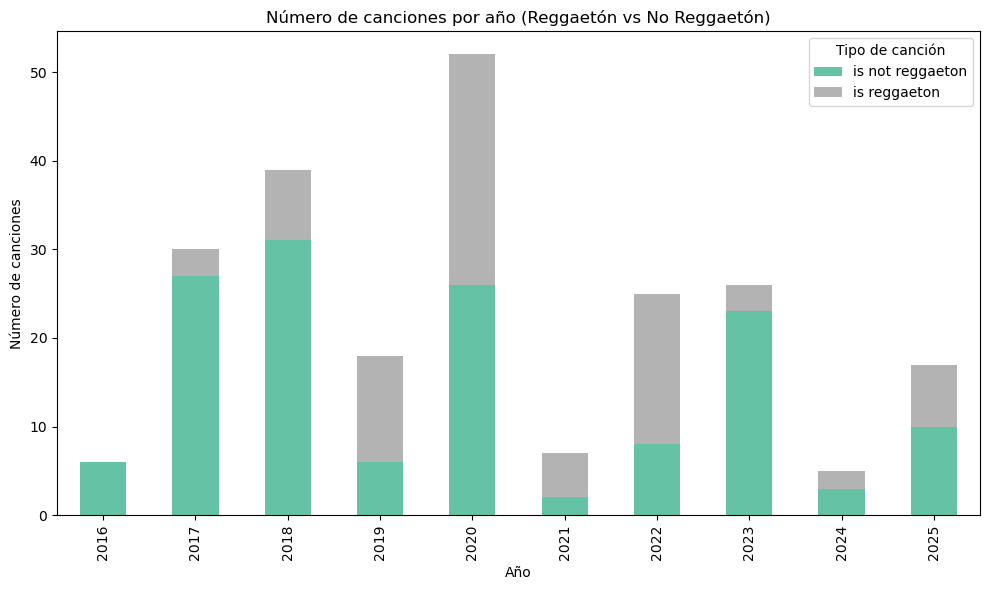

In [93]:
import matplotlib.pyplot as plt

conteo_por_tipo.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Número de canciones por año (Reggaetón vs No Reggaetón)')
plt.xlabel('Año')
plt.ylabel('Número de canciones')
plt.legend(title='Tipo de canción')
plt.tight_layout()
plt.show()

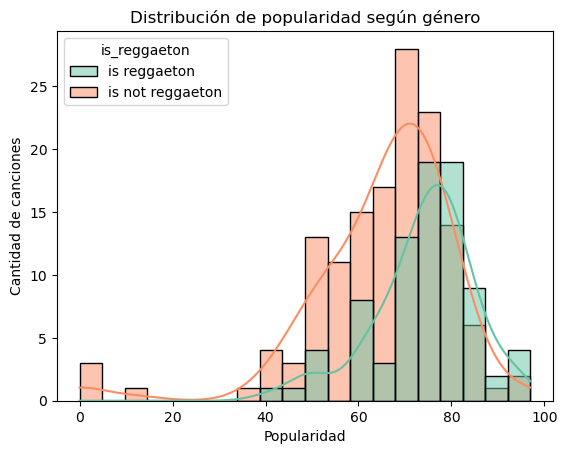

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_tracks, x='popularity', hue='is_reggaeton', bins=20, kde=True, palette='Set2')
plt.title('Distribución de popularidad según género')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de canciones')
plt.show()

In [95]:
df_tracks[df_tracks['popularity']==0]

,track_name,track_id,album,release_date,duration_ms,popularity,duration_min,is_reggaeton,release_year
53,El Favorito de los Capo (Remix),2aSO8xfNtShfSagvLqnOIW,Single,2018-01-05,278871,0,4.647850,is not reggaeton,2018
57,Amantes de una Noche,3BccBzVmd2t5xxktYhzYjR,Single,2018-01-12,225520,0,3.758667,is not reggaeton,2018
198,Original,718ugheE3FyrbiYb4tNrfY,Single,2018-06-29,246360,0,4.106000,is not reggaeton,2018


In [96]:
df_tracks['pred_genre'] = df_tracks.groupby('album')['is_reggaeton'].transform(
    lambda x: 'reggaeton' if (x == 'is reggaeton').sum() > (x == 'is not reggaeton').sum() else 'not reggaeton')

df_tracks['regtracks_count'] = df_tracks.groupby('album')['is_reggaeton'].transform(
    lambda x: (x == 'is reggaeton').sum())

df_tracks['nregtracks_count'] = df_tracks.groupby('album')['is_reggaeton'].transform(
    lambda x: (x == 'is not reggaeton').sum())


df_albums = df_tracks.groupby('album').agg(
    avg_popularity=('popularity', np.mean),
    track_count=('track_name', 'count'),
    release_year=('release_year','first'),
    pred_genre=('pred_genre','first'),
    regtracks_count=('regtracks_count','first'),
    nregtracks_count=('nregtracks_count','first')
    ).drop(labels='Single', axis=0)

df_albums.head(10)

,avg_popularity,track_count,release_year,pred_genre,regtracks_count,nregtracks_count
album,,,,,,
DeBÍ TiRAR MáS FOToS,88.411765,17,2025,not reggaeton,7,10
EL ÚLTIMO TOUR DEL MUNDO,69.687500,16,2020,not reggaeton,3,13
LAS QUE NO IBAN A SALIR,63.200000,10,2020,reggaeton,6,4
OASIS,70.875000,8,2019,reggaeton,6,2
Un Verano Sin Ti,79.608696,23,2022,reggaeton,16,7
X 100PRE,68.800000,15,2018,not reggaeton,4,11
YHLQMDLG,72.700000,20,2020,reggaeton,12,8
nadie sabe lo que va a pasar mañana,69.590909,22,2023,not reggaeton,2,20


In [98]:
corr1 = df_albums['avg_popularity'].corr(df_albums['regtracks_count'])
print(corr1)
corr2 = df_albums['avg_popularity'].corr(df_albums['nregtracks_count'])
print(corr2)

0.4368788933389543
0.025089149533290576


### Comparison: Impact of Reggaeton vs. Non-Reggaeton Songs on Popularity

We analyzed the correlations between the average popularity of albums and the number of songs categorized as either reggaeton or non-reggaeton.

- The correlation between **reggaeton songs** and **popularity** was **0.44**, indicating a **moderately positive** relationship. This suggests that albums with more reggaeton tracks tend to be more popular on average.

- In contrast, the correlation between **non-reggaeton songs** and **popularity** was only **0.03**, which is **virtually zero**. This implies that the number of non-reggaeton songs does **not significantly affect** an album’s popularity.

This contrast supports the hypothesis that reggaeton plays a relevant role in an album’s success, while other genres appear to have a much smaller impact in terms of popularity.
